In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import keras
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten , Activation
#from keras.optimizers import SGD ,RMSprop
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K

In [21]:
data=pd.read_csv('./Energy/train.csv')
testdata=pd.read_csv('./Energy/test.csv')

In [22]:
col_names=data.columns.values

In [23]:
col_names=col_names[1:8]

In [24]:
print(col_names)

['T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4']


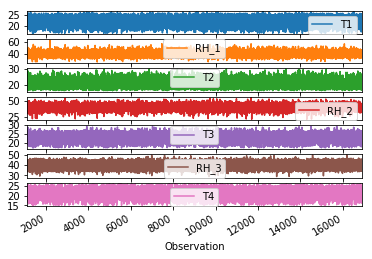

In [28]:
data.plot(x='Observation' , y=col_names, subplots=True )
plt.show()

In [58]:
#from sklearn.preprocessing import normalize

In [59]:
X_train_pre=data.iloc[:,:-1]
#X_train=normalize(X_train_pre)
X_test_pre=testdata
y_train=data.iloc[:,-1]
#X_test=normalize(X_test_pre)

In [60]:
X_train=X_train_pre
X_test=X_test_pre

In [61]:
RESHAPED =1
NB_EPOCH=25
BATCH_SIZE=128
VERBOSE =1
#NB_CLASSES=10 # number of ops
OPTIMIZER= SGD()
OPTIMIZER1=RMSprop()
N_HIDDEN=50
#VALIDATION_SPLIT=0.2
RESHAPED= 25

In [62]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
print(X_train.shape[0],'train samples')
print(X_test.shape[0],'test samples')

#y_test=np_utils.to_categorical(y_test , NB_CLASSES)
# Define the network
model=Sequential()
model.add(Dense(1,input_shape=(RESHAPED ,)))
model.add(Activation('relu'))
model.summary()
#Compiling the program
model.compile(loss='mean_squared_error', optimizer=OPTIMIZER , metrics=['accuracy'])
#training the model
history=model.fit(X_train , y_train , batch_size=BATCH_SIZE ,
epochs=NB_EPOCH , verbose=VERBOSE)

15780 train samples
3945 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 26        
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
15780/15780 [==============================] - 0s 3us/step - loss: 19652.8010 - acc: 0.0000e+00
Epoch 2/25
15780/15780 [==============================] - 0s 5us/step - loss: 19652.8010 - acc: 0.0000e+00
Epoch 3/25
15780/15780 [==============================] - 0s 4us/step - loss: 19652.8010 - acc: 0.0000e+00
Epoch 4/25
15780/15780 [==============================] - 0s 6us/step - loss: 19652.8010 - acc: 0.0000e+00
Epoch 5/25
15780/15780 [==============================] - 0s 9us/step - loss

In [63]:
predictions = model.predict(X_test, verbose=0)
submissions=pd.DataFrame(predictions)
submissions.to_csv("EnergyNNew.csv", index=False, header=True)

# USing xgBOOST Method on HackersRank Project

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [61]:
electricity_data=pd.read_csv('train.csv')

In [62]:
electricity_data.isnull().values.any()

False

In [63]:
y=electricity_data.E 

In [65]:
X=electricity_data.drop(['E','Ob'],axis=1)

In [66]:
electricity_dmatrix=xgb.DMatrix(data=X,label=y)

In [14]:
untuned_params={"objective":"reg:linear"}

In [15]:
untuned_cv_results_rmse= xgb.cv(dtrain=electricity_dmatrix, params=untuned_params , nfold=4 , metrics='rmse',as_pandas=True, seed=123)

In [16]:
print('untuned rmse : %f' %((untuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

untuned rmse : 86.199375


In [17]:
tuned_params={"objecive":"reg:linear","learning_rate":0.05 , "max_depth":5}

In [24]:
num_rounds=[50,100,150,200]

In [25]:
final_rmse_per_round=[]

In [26]:
for curr_num_rnd in num_rounds:
    cv_results= xgb.cv(dtrain=electricity_dmatrix, params=tuned_params , nfold=4 ,num_boost_round=curr_num_rnd, metrics='rmse',as_pandas=True, seed=123)
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])    

In [27]:
num_rounds_rmses = list(zip(num_rounds,final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses , columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds       rmse
0                   50  89.240480
1                  100  85.609408
2                  150  83.802118
3                  200  82.272137


In [18]:
tuned_cv_results_rmse= xgb.cv(dtrain=electricity_dmatrix, params=tuned_params , nfold=4 ,num_boost_round=200, metrics='rmse',as_pandas=True, seed=123)

In [19]:
print('tuned rmse : %f' %((tuned_cv_results_rmse["test-rmse-mean"]).tail(1)))

tuned rmse : 82.272137


In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
gbm_param_grid={'learning_rate':np.arange(0.05 ,1.05,0.05),'n_estimators':[500],'subsample':np.arange(0.05,1.05,0.05),'max_depth':np.arange(1,8,1)}

In [72]:
gbm=xgb.XGBRegressor()

In [10]:
randomized_mse=RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid , n_iter=30 , scoring='neg_mean_squared_error', cv=5 ,verbose=1)

NameError: name 'gbm' is not defined

In [74]:
randomized_mse.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 19.1min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'learning_rate': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]), 'n_estimators': [500], 'subsample': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7])},
          pre_dispatch='2*n_jobs', rand

In [75]:
print("Best parameter found" ,randomized_mse.best_params_)

Best parameter found {'subsample': 0.35000000000000003, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.050000000000000003}


In [65]:
print("lowest RMSE" ,randomized_mse.best_score_)

lowest RMSE -6194.75569376


In [76]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

train_X,test_X,train_y,test_y=train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_model = XGBRegressor(n_estimators=500,learning_rate=0.05,subsample=0.35,max_depth=7)
my_model.fit(train_X, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.35)

In [77]:
print(my_model.feature_importances_)

[ 0.1432467   0.07034621  0.07859584  0.04124815  0.05105105  0.04300852
  0.04521763  0.0303752   0.03524214  0.02899451  0.0431466   0.03327465
  0.03034069  0.02209106  0.03172138  0.02864934  0.03827966  0.01442822
  0.03099651  0.02039971  0.04266335  0.02844224  0.02526665  0.01908805
  0.02388595]


In [78]:
predictions = my_model.predict(test_X)

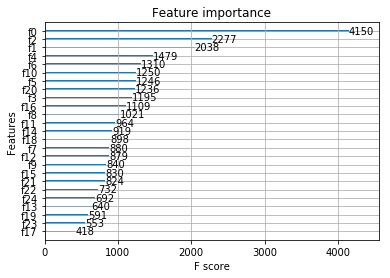

Index(['Ob', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_O',
       'P', 'RH_O', 'W', 'V', 'TP'],
      dtype='object')

In [79]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
plot_importance(my_model)
plt.show()
X.columns

In [80]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 35.6780295992


In [81]:
Test_df=pd.read_csv('test.csv')
Test_X=Test_df
predictions = my_model.predict(Test_X.as_matrix())

In [82]:
my_submission = pd.DataFrame({'Observation': Test_df.Ob, 'Energy': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('submissionlate.csv', index=False,columns=['Observation','Energy'])

# Another Implementation xgBoost

In [60]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [61]:
electricity_data= pd.read_csv('train.csv')

In [62]:
X,y=electricity_data[electricity_data.columns.tolist()[:-1]],electricity_data[electricity_data.columns.tolist()[-1]]

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
electricity_dmatrix=xgb.DMatrix(data= X, label=y)

In [69]:
gbm_param_grid={'learning_rate':np.arange(0.05 ,1.05,0.05),'n_estimators':[750],'subsample':np.arange(0.05,1.05,0.05),'max_depth':np.arange(1,8,1) , 'min_child_weight':np.arange(1,7,1)}

In [70]:
gbm=xgb.XGBRegressor()

In [71]:
randomized_mse=RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid ,n_iter=25, scoring='neg_mean_squared_error', cv=10 ,verbose=1)

In [72]:
randomized_mse.fit(X,y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 53.4min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=25, n_jobs=1,
          param_distributions={'learning_rate': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]), 'n_estimators': [750], 'subsample': array([ 0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,  0.45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7]), 'min_child_weight': array([1, 2, 3, 4, 

In [73]:
print("Best parameter found" ,randomized_mse.best_params_)

Best parameter found {'subsample': 0.95000000000000007, 'n_estimators': 750, 'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.25}


In [74]:
print("lowest RMSE" ,randomized_mse.best_score_)

lowest RMSE -4821.23795283


In [75]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

train_X,test_X,train_y,test_y=train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_model = XGBRegressor(n_estimators=750,learning_rate=0.250,subsample=0.95,max_depth=6,min_child_weight=3,)
my_model.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.25, max_delta_step=0,
       max_depth=6, min_child_weight=3, missing=None, n_estimators=750,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.95)

In [76]:
predictions = my_model.predict(test_X)

In [77]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 37.0797050583


In [18]:
Test_df=pd.read_csv('test.csv')
Test_X=Test_df
predictions = my_model.predict(Test_X.as_matrix())

In [19]:
my_submission=pd.DataFrame(predictions)
# you could use any filename. We choose submission here
my_submission.to_csv('submissionlate3.csv', index=False)